# Lab №4. Kamaletdinova Julia

In [113]:
library(repr)
library(ggplot2)

#### Custom chi-square function

In [111]:
chi_square <- function(data, feature1, feature2) {
    n <- dim(data)[1]
    r <- nlevels(feature1)
    c <- nlevels(feature2)
    
    result <- list(statistics = 0,
                   observed = table(levels(feature1), levels(feature2)),
                   expected = table(levels(feature1), levels(feature2)),
                   pvalue = 0, 
                   deg_freedom = 0)
    
    result$observed <- table(feature1, feature2)
    result$deg_freedom <- (r - 1) * (c - 1)
    
    i <- 1
    j <- 1
    for (r_level in levels(feature1)) {
        for (c_level in levels(feature2)) {
            n_r <- dim(data[feature1 == r_level,])[1]
            n_c <- dim(data[feature2 == c_level,])[1]
            
            observed <- dim(data[feature1 == levels(feature1)[1] & feature2 == levels(feature2)[1],])[1]
            expected <- (n_r * n_c) / n
            result$statistics <- result$statistics + ((observed - expected)^2) / n
            result$expected[i, j] <- expected
            
            j <- j + 1
        }
        i <- i + 1
        j <- 1
    }
    result$pvalue <- pchisq(result$statistics, 
                            df = result$deg_freedom, 
                            lower.tail = FALSE)
    return(result)
}

In [51]:
df = read.table('nut_dataframe.csv', sep=',', header=TRUE, na.strings="NA")
head(df)

X,Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,⋯,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol
0,-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,⋯,3,2,1,1,0,0,0,1,0,1
1,-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,⋯,2,2,1,1,0,0,1,1,0,1
2,-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,⋯,2,2,1,1,0,0,1,1,0,1
3,-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,⋯,3,1,1,1,0,0,1,1,0,1
4,-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,⋯,1,3,0,1,1,0,1,1,0,1
5,-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,⋯,1,3,1,1,1,1,1,1,0,2


In [221]:
summary(df)

       X              Germ             GBegF            BegFEndF      
 Min.   :  0.0   Min.   :-2.1290   Min.   :-4.9566   Min.   :-5.1070  
 1st Qu.:100.8   1st Qu.: 0.1167   1st Qu.:-0.6495   1st Qu.:-0.7845  
 Median :201.5   Median : 0.1167   Median : 0.3444   Median :-0.1146  
 Mean   :201.5   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:302.2   3rd Qu.: 0.1167   3rd Qu.: 0.3444   3rd Qu.: 0.6145  
 Max.   :403.0   Max.   : 2.3625   Max.   : 6.9707   Max.   : 3.1666  
 NA's   :2       NA's   :2         NA's   :2         NA's   :2        
    EndFBegM           BegMEndM           Height             Hlp         
 Min.   :-4.66913   Min.   :-2.7265   Min.   :-3.2550   Min.   :-2.0761  
 1st Qu.:-0.67448   1st Qu.:-0.7607   1st Qu.:-0.4460   1st Qu.:-0.5445  
 Median : 0.05772   Median :-0.1054   Median : 0.1158   Median :-0.1070  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.59631   3rd Qu.: 0.5498   3rd Qu.: 0.6776   3rd Qu

#### Categorial variables as factors

In [52]:
df[,seq(17, dim(df)[2])] <- lapply(df[,seq(17, dim(df)[2])], factor)

In [238]:
test <- chisq.test(table(df$FlowStemCol, df$BushShape))
test
print('Observed')
test$observed

print('Expected')
test$expected

print('Residuals')
test$residuals

print('Statisitics')
chi = test$statistic
test$statistic


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df$FlowStemCol, df$BushShape)
X-squared = 13.89, df = 1, p-value = 0.0001938


[1] "Observed"


   
      0   1
  0 138  93
  1  71 104

[1] "Expected"


,0,1
0,118.91379,112.08621
1,90.08621,84.91379


[1] "Residuals"


   
            0         1
  0  1.750264 -1.802783
  1 -2.010900  2.071240

[1] "Statisitics"


X-squared 
 13.88984

#### Performance of custom chi-square test

In [239]:
test_custom <- chi_square(df, df$FlowStemCol, df$BushShape)
print('Observed')
test_custom$observed

print('Expected')
test_custom$expected

print('Statisitics')
chi = test_custom$statistic
test_custom$statistic

print("Df")
test_custom$deg_freedom

print('P-value')
test_custom$pvalue

[1] "Observed"


        feature2
feature1   0   1
       0 138  93
       1  71 104

[1] "Expected"


   
            0         1
  0 118.91379 112.08621
  1  90.08621  84.91379

[1] "Statisitics"


[1] 15.14701

[1] "Df"


[1] 1

[1] "P-value"


[1] 9.945584e-05

### Plot Chi-square statistics distribution

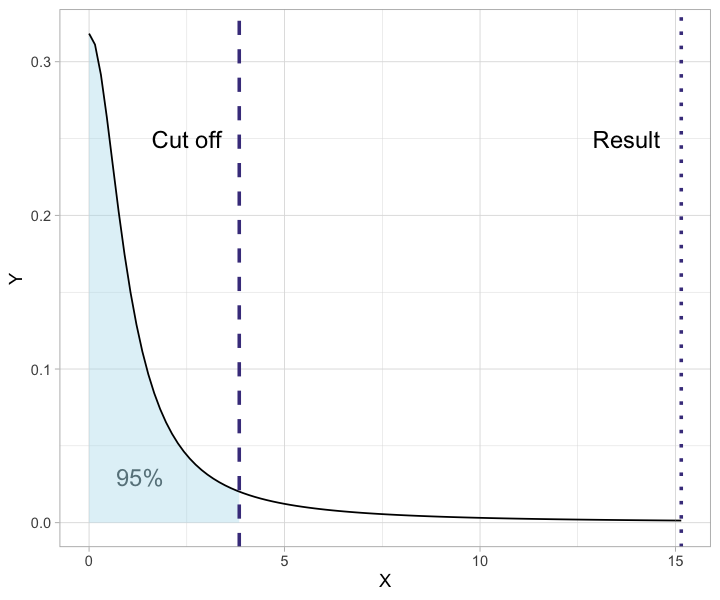

In [252]:
options(repr.plot.width=6, repr.plot.height=5)
p <- 0.05
gg <- data.frame(x = seq(0, 4, 0.1))
gg$y <- dchisq(gg$x, test_custom$deg_freedom)
cutoff <- qchisq(p, test_custom$deg_freedom, lower.tail = F)

ggplot(gg, aes(x, y)) +
        stat_function(fun = dt, 
                      args = list(df = test_custom$deg_freedom),
                      xlim = c(0, cutoff),
                      geom = "area",
                      alpha = 0.4,
                      fill = "lightblue2") +
        stat_function(fun = dt, args = list(df = test_custom$deg_freedom)) +
        geom_vline(xintercept = cutoff, 
                   linetype = "dashed",
                   size = 1,
                   col = "darkslateblue") +
        geom_vline(xintercept = test_custom$statistic,
                   linetype = "dotted",
                   size = 1,
                   col = "darkslateblue") +
        labs(x = "X", y = "Y") +
        annotate(geom = "text", x = test_custom$statistic - 1.4, y = 0.25, size = 5, label = "Result", 
                 color = "black") +
        annotate(geom = "text", x = 2.5, y = 0.25, size = 5, label = "Cut off", 
                 color = "black") +
        annotate(geom = "text", x = 1.3, y = 0.03, size = 5, label = "95%", 
                 color = "lightblue4") + 
        theme_light()

### Biased variance

\begin{aligned}
    \operatorname{E} [S^{2}]&=\operatorname{E} \left[{\frac {1}{n}}\sum _{i=1}^{n}{\big (}X_{i}-{\overline {X}}{\big )}^{2}\right] =
    \operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}{\bigg (}(X_{i}-\mu )-
    ({\overline {X}}-\mu ){\bigg )}^{2}{\bigg ]}\\[8pt]&=
    \operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}{\bigg (}(X_{i}-\mu )^{2}-2({\overline {X}}-\mu )(X_{i}-\mu )+({\overline {X}}-\mu )^{2}{\bigg )}{\bigg ]}\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}-{\frac {2}{n}}({\overline {X}}-\mu )\sum _{i=1}^{n}(X_{i}-\mu )+{\frac {1}{n}}({\overline {X}}-\mu )^{2}\sum _{i=1}^{n}1{\bigg ]}\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}-{\frac {2}{n}}({\overline {X}}-\mu )\sum _{i=1}^{n}(X_{i}-\mu )+{\frac {1}{n}}({\overline {X}}-\mu )^{2}\cdot n{\bigg ]}\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}-{\frac {2}{n}}({\overline {X}}-\mu )\sum _{i=1}^{n}(X_{i}-\mu )+({\overline {X}}-\mu )^{2}{\bigg ]}\\[8pt]
\end{aligned}

\begin{aligned}{\text{Notice that}} \end{aligned}

\begin{aligned}{
\overline {X}}-\mu ={\frac {1}{n}}\sum _{i=1}^{n}X_{i}-\mu ={\frac {1}{n}}\sum _{i=1}^{n}X_{i}-{\frac {1}{n}}\sum _{i=1}^{n}\mu \ ={\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu ).\\[8pt]
\end{aligned}

\begin{aligned}{\text{Then}} \end{aligned}
\begin{aligned}{ n\cdot ({\overline {X}}-\mu )=\sum _{i=1}^{n}(X_{i}-\mu )}\end{aligned}

\begin{aligned}{\text{Continuing with the last result}} \end{aligned} 

\begin{aligned}
\operatorname{E} [S^{2}]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}-{\frac {2}{n}}({\overline {X}}-
\mu )\sum _{i=1}^{n}(X_{i}-\mu )+({\overline {X}}-\mu )^{2}{\bigg ]}\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}
^{n}(X_{i}-\mu )^{2}-{\frac {2}{n}}({\overline {X}}-\mu )\cdot n\cdot ({\overline {X}}-\mu )+({\overline {X}}-\mu )^{2}{\bigg ]}
\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}-2({\overline {X}}-\mu )^{2}+({\overline {X}}-
\mu )^{2}{\bigg ]}\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}-({\overline {X}}-\mu )^{2}
{\bigg ]}\\[8pt]&=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}(X_{i}-\mu )^{2}{\bigg ]}-\operatorname {E} {\bigg [}
({\overline {X}}-\mu )^{2}{\bigg ]}\\[8pt]&=\sigma ^{2}-\operatorname {E} \left[({\overline {X}}-\mu )^{2}\right]=\left(1-{\frac {1}
{n}}\right)\sigma ^{2} = \frac{n-1}{n}\sigma ^{2} <\sigma ^{2}.
\end{aligned}

### Unbiased variance

We have to multiply biased variance by $\frac{n}{n-1}$ to have it unbiased

$$S^2 = {\frac {1}{n-1}}\sum _{i=1}^{n}{\big (}X_{i}-{\overline {X}}{\big )}^{2}$$